# Multiple graphs (그래프 여러개 그리기)

In [ ]:
# matplotlib 사용과 한글 처리를 위한 code

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False    # minus 표시
mpl.rc('font', family='Malgun Gothic')
%matplotlib inline

In [5]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["font.size"] = 14

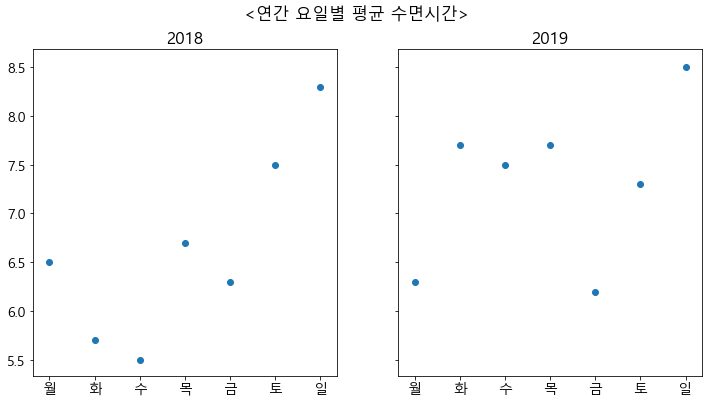

In [14]:
# 12-10.

x = ['월', '화', '수', '목', '금', '토', '일']
y1 = [6.5, 5.7, 5.5, 6.7, 6.3, 7.5, 8.3]
y2 = [6.3, 7.7, 7.5, 7.7, 6.2, 7.3, 8.5]

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
ax = axs[0]             # 행은 1개, 열은 2개
ax.scatter(x,y1)
ax.set_title('2018')

ax = axs[1]
ax.scatter(x,y2)
ax.set_title('2019')

fig.suptitle('<연간 요일별 평균 수면시간>')

plt.show()

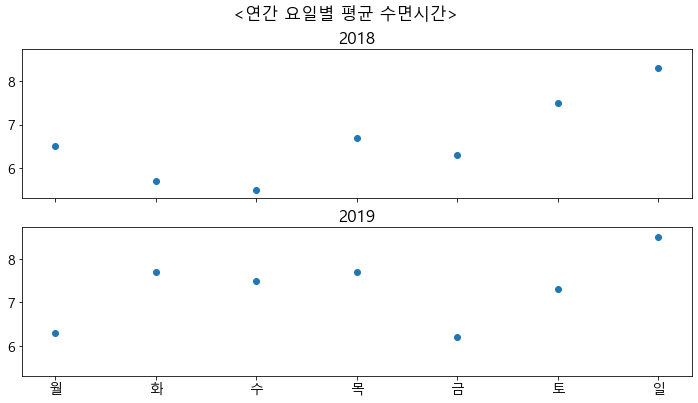

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)
ax = axs[0]           
ax.scatter(x,y1)
ax.set_title('2018')

ax = axs[1]
ax.scatter(x,y2)
ax.set_title('2019')

fig.suptitle('<연간 요일별 평균 수면시간>')

plt.show()

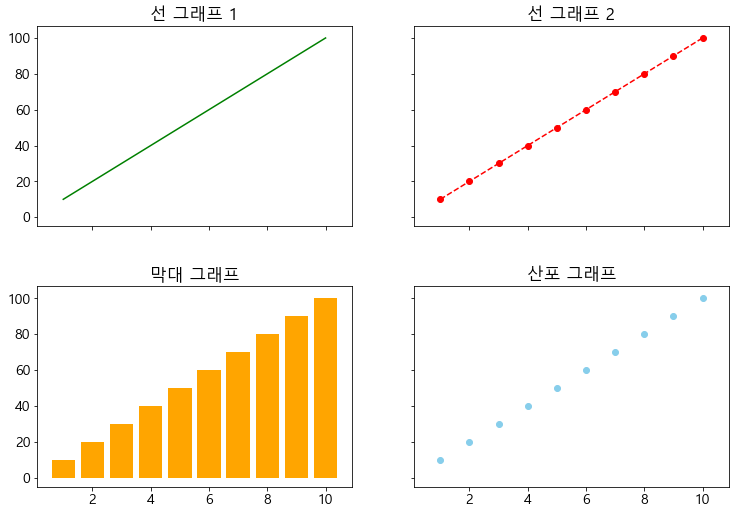

In [27]:
# 12-11.

import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='Malgun Gothic')

x = list(range(1,11))
y = list(range(10, 101, 10))

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True, sharey=True)
ax = axs[0][0]
ax.plot(x,y, color='green')
ax.set_title('선 그래프 1')

ax = axs[0,1]   # numpy 형태의 인덱싱 가능!
ax.plot(x,y, color='red', linestyle='--', marker='o')
ax.set_title('선 그래프 2')

ax = axs[1][0]
ax.bar(x,y, color='orange')
ax.set_title('막대 그래프')

ax = axs[1][1]
ax.scatter(x,y, color='skyblue')
ax.set_title('산포 그래프')

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.3)

plt.show()

## Anscombe's Quartet

In [33]:
import seaborn as sns
ans = sns.load_dataset('anscombe')

In [34]:
ans.shape

(44, 3)

In [36]:
ans.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [37]:
ans.tail()

,dataset,x,y
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89


In [39]:
ans.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [45]:
ds1 = ans[ans['dataset'] == 'I']
ds2 = ans[ans['dataset'] == 'II']
ds3 = ans[ans['dataset'] == 'III']
ds4 = ans[ans['dataset'] == 'IV']

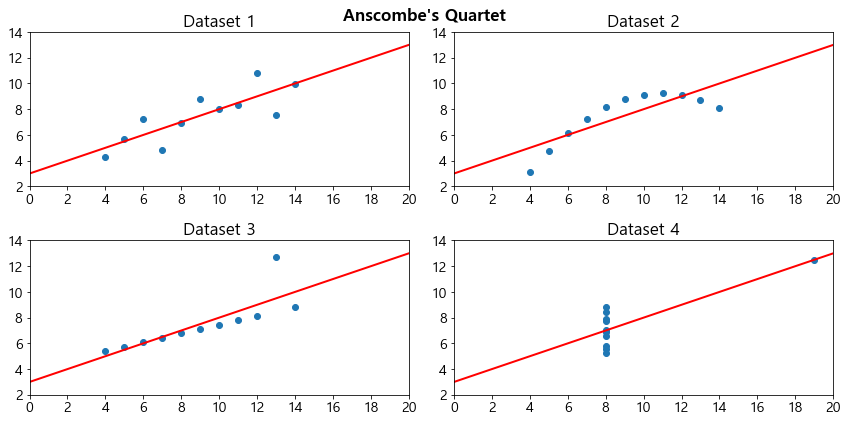

In [55]:
fig = plt.figure()
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

axes1.plot(ds1['x'], ds1['y'], 'o')
axes2.plot(ds2['x'], ds2['y'], 'o')
axes3.plot(ds3['x'], ds3['y'], 'o')
axes4.plot(ds4['x'], ds4['y'], 'o')

axes1.plot([0,20], [3,13], 'r-', lw=2)
axes2.plot([0,20], [3,13], 'r-', lw=2)
axes3.plot([0,20], [3,13], 'r-', lw=2)
axes4.plot([0,20], [3,13], 'r-', lw=2)

axes1.set(xlim=(0,20), ylim=(2,14))
axes2.set(xlim=(0,20), ylim=(2,14))
axes3.set(xlim=(0,20), ylim=(2,14))
axes4.set(xlim=(0,20), ylim=(2,14))

axes1.set(xticks=range(0,21,2), yticks=range(2,15,2))
axes2.set(xticks=range(0,21,2), yticks=range(2,15,2))
axes3.set(xticks=range(0,21,2), yticks=range(2,15,2))
axes4.set(xticks=range(0,21,2), yticks=range(2,15,2))

axes1.set_title('Dataset 1')
axes2.set_title('Dataset 2')
axes3.set_title('Dataset 3')
axes4.set_title('Dataset 4')

fig.suptitle("Anscombe's Quartet", weight="bold")
fig.tight_layout()
plt.show()

## Refactoring

In [64]:
ds = []
ds.append(ans[ans['dataset'] == 'I'])
ds.append(ans[ans['dataset'] == 'II'])
ds.append(ans[ans['dataset'] == 'III'])
ds.append(ans[ans['dataset'] == 'IV'])

In [59]:
ds

[   dataset     x      y
 0        I  10.0   8.04
 1        I   8.0   6.95
 2        I  13.0   7.58
 3        I   9.0   8.81
 4        I  11.0   8.33
 5        I  14.0   9.96
 6        I   6.0   7.24
 7        I   4.0   4.26
 8        I  12.0  10.84
 9        I   7.0   4.82
 10       I   5.0   5.68,
    dataset     x     y
 11      II  10.0  9.14
 12      II   8.0  8.14
 13      II  13.0  8.74
 14      II   9.0  8.77
 15      II  11.0  9.26
 16      II  14.0  8.10
 17      II   6.0  6.13
 18      II   4.0  3.10
 19      II  12.0  9.13
 20      II   7.0  7.26
 21      II   5.0  4.74,
    dataset     x      y
 22     III  10.0   7.46
 23     III   8.0   6.77
 24     III  13.0  12.74
 25     III   9.0   7.11
 26     III  11.0   7.81
 27     III  14.0   8.84
 28     III   6.0   6.08
 29     III   4.0   5.39
 30     III  12.0   8.15
 31     III   7.0   6.42
 32     III   5.0   5.73,
    dataset     x      y
 33      IV   8.0   6.58
 34      IV   8.0   5.76
 35      IV   8.0   7.71
 36      

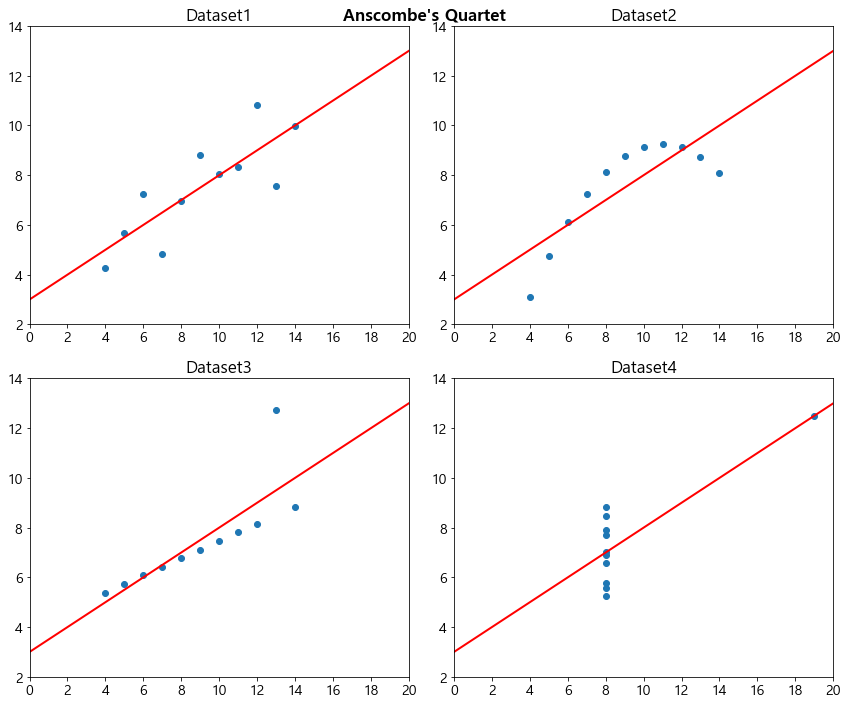

In [73]:
fig, axs = plt.subplots(2, 2, figsize=(12,10))
for i in range(4):
    axs[i//2][i%2].plot(ds[i]['x'], ds[i]['y'], 'o')
    axs[i//2][i%2].plot([0,20], [3,13], 'r-', lw=2)
    axs[i//2][i%2].set(xlim=(0,20), ylim=(2,14))
    axs[i//2][i%2].set(xticks=range(0,21,2), yticks=range(2,15,2))
    axs[i//2][i%2].set_title('Dataset' + str(i+1))

fig.suptitle("Anscombe's Quartet", weight="bold")
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.3)
fig.tight_layout()
plt.show()

## Seaborn graph

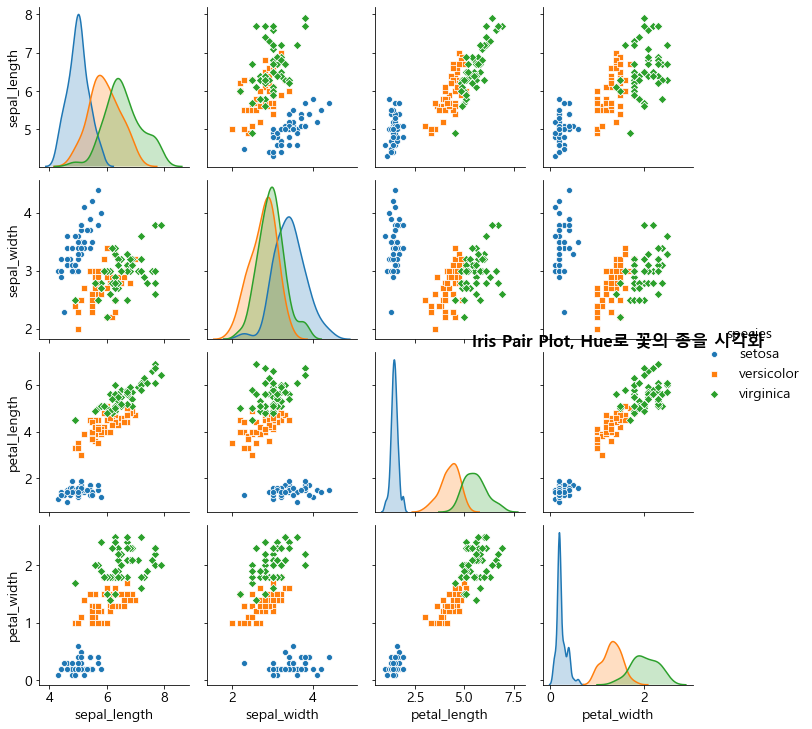

In [68]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터

sns.pairplot(iris, hue="species", markers=["o", "s", "D"]) # 색은 종별로 다르게
plt.title("Iris Pair Plot, Hue로 꽃의 종을 시각화",weight="bold")
plt.show()